# K-Means Clustering
原文通过质心的移动来演示K-Means聚类算法的工作原理。

## OpenCV中使用cv.kmeans()函数
OpenCV中的cv.kmeans()函数可以用来执行K-Means聚类算法。它的语法如下：
```
compactness,labels,centers = cv.kmeans(samples, nclusters, criteria, attempts, flags)
```
参数说明：
- samples: 应该是np.float32类型的数据，每个特征应该放在一列。
- nclusters(K): 聚类的最终数目。
- criteria: 终止条件，它应该是一个含有3个成员的元组，它们是（typw，max_iter，epsilon）：
    - type终止的类型：有如下三种选择：
        - cv.TERM_CRITERIA_EPS 只有精确度epsilon满足是停止迭代。
        - cv.TERM_CRITERIA_MAX_ITER 当迭代次数超过阈值时停止迭代。
        - cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER 上面的任何一个条件满足时停止迭代。
    - max_iter：最大迭代次数。
    - epsilon：精确度阈值。
- attempts: 使用不同的起始标记来执行算法的次数。算法会返回紧密度最好的标记。紧密度也会作为输出被返回。
- flags：用来设置如何选择起始重心。通常我们有两个选择：cv.KMEANS_PP_CENTERS和cv.KMEANS_RANDOM_CENTERS。  

返回值：
- centers: 聚类中心的输出矩阵，每个聚类中心都是一行数据。
- compactness: 紧密度，返回每个点到相应聚类中心的距离的平方和。
- labels: 标志数组，每个成员被标记为0，1等

# 1. 单特征数据


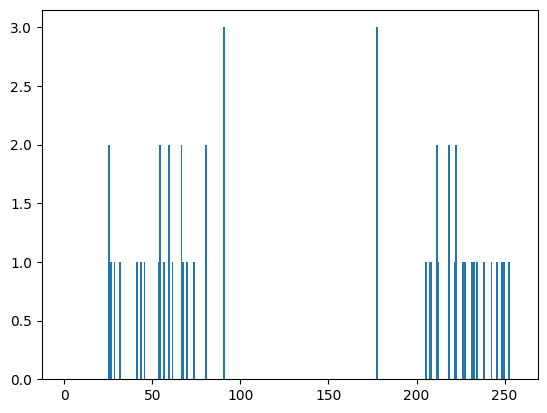

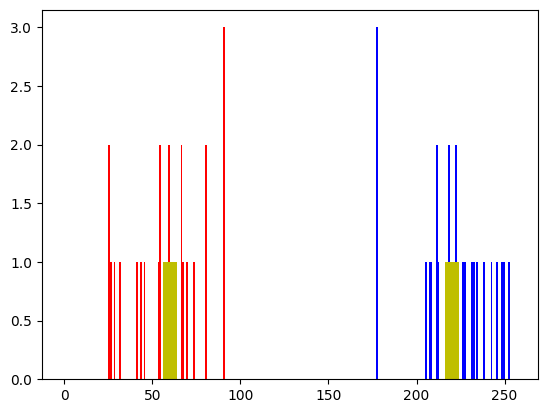

In [10]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

# 身高与T恤尺码的关系
# 生成随机数据 np.random.randint(low,high,size)
x = np.random.randint(25,100,25)
y = np.random.randint(175,255,25)
# debug
# np.hstack() 水平拼接
z = np.hstack((x,y))

z = z.reshape((50,1))


z = np.float32(z)

# plt.hist(z,256,[0,256])
plt.hist(z,256,[0,256])

plt.show()

# 定义终止标准 = ( type, max_iter = 10 , epsilon = 1.0 )
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
# 设置标志
flags = cv.KMEANS_RANDOM_CENTERS
# 应用K均值
compactness,labels,centers = cv.kmeans(z,2,None,criteria,10,flags)
A = z[labels==0]
B = z[labels==1]
# 现在绘制用红色'A'，用蓝色绘制'B'，用黄色绘制中心
plt.hist(A,256,[0,256],color = 'r')
plt.hist(B,256,[0,256],color = 'b')
plt.hist(centers,32,[0,256],color = 'y')
plt.show()

## 2. 多特征数据

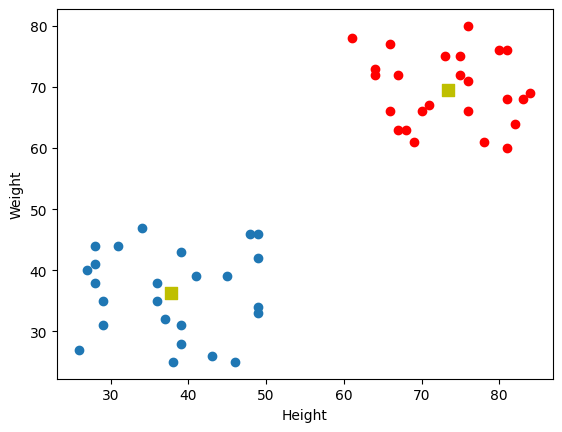

In [15]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt
X = np.random.randint(25,50,(25,2))
Y = np.random.randint(60,85,(25,2))
Z = np.vstack((X,Y))
# 将数据转换未 np.float32
Z = np.float32(Z)
# 定义停止标准，应用K均值
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)

ret,label,center=cv.kmeans(Z,2,None,criteria,10,cv.KMEANS_RANDOM_CENTERS)

# 现在分离数据, Note the flatten()
A = Z[label.ravel()==0]
B = Z[label.ravel()==1]
# 绘制数据
plt.scatter(A[:,0],A[:,1])
plt.scatter(B[:,0],B[:,1],c = 'r')

plt.scatter(center[:,0],center[:,1],s = 80,c = 'y', marker = 's')
plt.xlabel('Height'),plt.ylabel('Weight')
plt.show()

## 3.颜色量化

In [36]:
import numpy as np
import cv2 as cv
img = cv.imread('../data/home.jpg')

Z = img.reshape((-1,3))
# 将数据转化为np.float32
Z = np.float32(Z)

# 定义终止标准 聚类数并应用k均值
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 10
ret,label,center=cv.kmeans(Z,K,None,criteria,10,cv.KMEANS_RANDOM_CENTERS)

# 现在将数据转化为uint8, 并绘制原图像
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img.shape))
cv.imshow('res2',res2)
cv.waitKey(0)
cv.destroyAllWindows()